In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
mode = 1
# 1 - background color
# 2 - letter
# 3 - object color

use_strong = False

n = 10000
p = 0.95

n_neutral = 200

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf

if mode == 1:
    from Heuristics import heuristic_1 as heuristic_base
    from Sample import sample_1 as sample
elif mode == 2:
    from Heuristics import heuristic_2 as heuristic_base
    from Sample import sample_2 as sample
elif mode == 3:
    from Heuristics import heuristic_3 as heuristic_base
    from Sample import sample_3 as sample
    
def heuristic(im, meta):
    return heuristic_base(im, meta, use_strong = use_strong)

from Explore import explore
from Heuristics import augment
from Load import load
from Model import get_model, loss

from Core import acc
from Train import train

In [4]:
# Create the datasets

X_train, X_val, X_test, X_neutral, Y_train, Y_val, Y_test, Y_neutral, meta_train, meta_val, meta_test = \
load(sample, n, p, n_neutral)


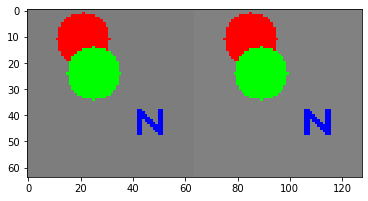

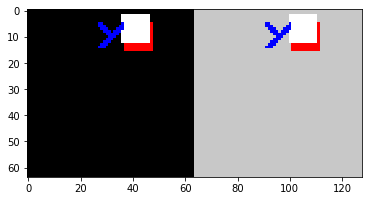

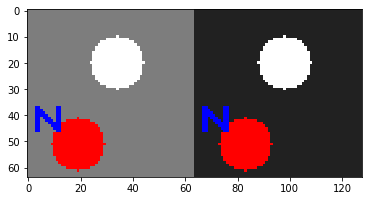

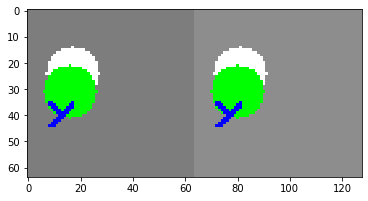

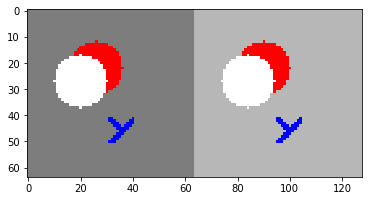

In [5]:

for index in range(5):
    x = X_train[index]
    meta = meta_train[index]
    x_h, _ = heuristic(x, meta)
    plt.imshow(np.hstack((x, x_h)))
    plt.show()
    plt.close()
    

In [6]:
# Train a model on the 'bad' dataset and evaluate on both

model = get_model()
train(model, loss, X_train, Y_train, X_val, Y_val, "Models/original")
print()
print("Training Distribution Test Acc: ", acc(model, X_test, Y_test))
print("Neutral Distribution Test Acc: ", acc(model, X_neutral, Y_neutral))

Epoch / Epoch Train Loss / Val Loss: 0 0.23361982 0.2033243 -> saving
Epoch / Epoch Train Loss / Val Loss: 1 0.19576083 0.18997875 -> saving
Epoch / Epoch Train Loss / Val Loss: 2 0.18995869 0.20766068
Epoch / Epoch Train Loss / Val Loss: 3 0.18459432 0.20239992
Epoch / Epoch Train Loss / Val Loss: 4 0.18606484 0.17969877 -> saving
Epoch / Epoch Train Loss / Val Loss: 5 0.18229409 0.20341127
Epoch / Epoch Train Loss / Val Loss: 6 0.17672844 0.19742985
Epoch / Epoch Train Loss / Val Loss: 7 0.17988262 0.2136167
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 8 0.16023965 0.20432587
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 9 0.15469673 0.1936335
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 10 0.14730692 0.18988413
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 11 0.15065752 0.24386893
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 12 0.1504225 0.17363895 -> saving
Epoch / Epoch Train Loss / Val Loss: 13 0.14777917 0.


1


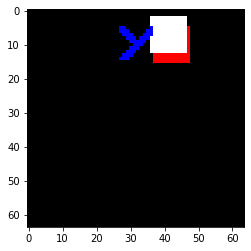

Initial Prediction:  [[False]]


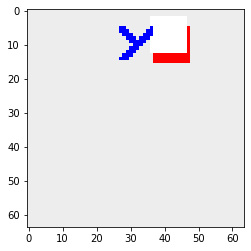

New Prediction:  [[ True]]


3


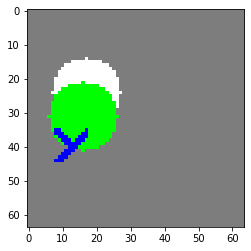

Initial Prediction:  [[ True]]


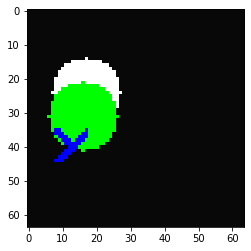

New Prediction:  [[False]]


5


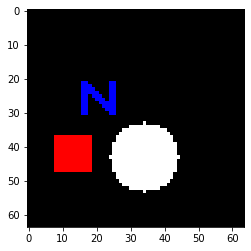

Initial Prediction:  [[False]]


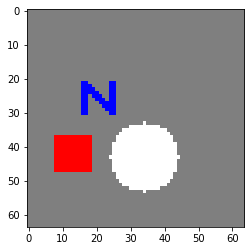

New Prediction:  [[ True]]

Hit max_display


In [7]:
# Check the heuristic's effectiveness

model.load_weights("Models/original")
explore(model, X_train, Y_train, meta_train, heuristic)

In [8]:
# Augment the training dataset using the heuristic

X_train_aug, Y_train_aug = augment(X_train, Y_train, meta_train, heuristic)

X_val_aug, Y_val_aug = augment(X_val, Y_val, meta_val, heuristic)

In [9]:
# Fine-tune the model on the augmented data

model.load_weights("Models/original")
train(model, loss, X_train_aug, Y_train_aug, X_val_aug, Y_val_aug, "Models/new")
print()
print("Training Distribution Test Acc: ", acc(model, X_test, Y_test))
print("Neutral Distribution Test Acc: ", acc(model, X_neutral, Y_neutral))

Epoch / Epoch Train Loss / Val Loss: 0 0.5251037 0.5188759 -> saving
Epoch / Epoch Train Loss / Val Loss: 1 0.48602858 0.49389565 -> saving
Epoch / Epoch Train Loss / Val Loss: 2 0.4554682 0.4880404 -> saving
Epoch / Epoch Train Loss / Val Loss: 3 0.42539617 0.4992106
Epoch / Epoch Train Loss / Val Loss: 4 0.40758127 0.47532693 -> saving
Epoch / Epoch Train Loss / Val Loss: 5 0.37822598 0.46483558 -> saving
Epoch / Epoch Train Loss / Val Loss: 6 0.34101433 0.44632134 -> saving
Epoch / Epoch Train Loss / Val Loss: 7 0.3035837 0.4925985
Epoch / Epoch Train Loss / Val Loss: 8 0.27595487 0.45028877
Epoch / Epoch Train Loss / Val Loss: 9 0.24128391 0.47844994
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 10 0.18308096 0.43918213 -> saving
Epoch / Epoch Train Loss / Val Loss: 11 0.16550796 0.43013108 -> saving
Epoch / Epoch Train Loss / Val Loss: 12 0.15626638 0.4384145
Epoch / Epoch Train Loss / Val Loss: 13 0.14443314 0.45281076
Epoch / Epoch Train Loss / Val Loss: 14 0.13658

In [10]:
# Fine-tune the model on the augmented data 

model.load_weights("Models/original")
train(model, loss, X_train_aug, Y_train_aug, X_val_aug, Y_val_aug, "Models/new", mixup=True, alpha = 0.2)
print()
print("Training Distribution Test Acc: ", acc(model, X_test, Y_test))
print("Neutral Distribution Test Acc: ", acc(model, X_neutral, Y_neutral))

Epoch / Epoch Train Loss / Val Loss: 0 0.57293206 0.52777636 -> saving
Epoch / Epoch Train Loss / Val Loss: 1 0.54363567 0.5112861 -> saving
Epoch / Epoch Train Loss / Val Loss: 2 0.5236268 0.4996878 -> saving
Epoch / Epoch Train Loss / Val Loss: 3 0.49291494 0.4737699 -> saving
Epoch / Epoch Train Loss / Val Loss: 4 0.47636697 0.45227584 -> saving
Epoch / Epoch Train Loss / Val Loss: 5 0.45101473 0.5039655
Epoch / Epoch Train Loss / Val Loss: 6 0.42875233 0.40679047 -> saving
Epoch / Epoch Train Loss / Val Loss: 7 0.4153547 0.41403395
Epoch / Epoch Train Loss / Val Loss: 8 0.36853892 0.3915952 -> saving
Epoch / Epoch Train Loss / Val Loss: 9 0.36122826 0.3164854 -> saving
Epoch / Epoch Train Loss / Val Loss: 10 0.31964812 0.3144394 -> saving
Epoch / Epoch Train Loss / Val Loss: 11 0.2970989 0.28347734 -> saving
Epoch / Epoch Train Loss / Val Loss: 12 0.2864504 0.3059119
Epoch / Epoch Train Loss / Val Loss: 13 0.2840644 0.26865348 -> saving
Epoch / Epoch Train Loss / Val Loss: 14 0.282

Searching Training Set

20


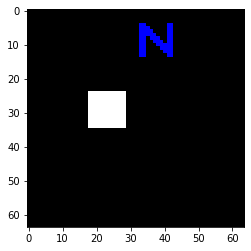

Initial Prediction:  [[False]]


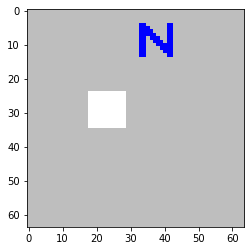

New Prediction:  [[ True]]


44


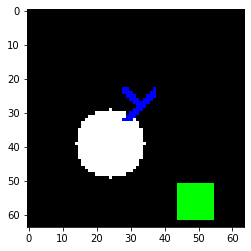

Initial Prediction:  [[False]]


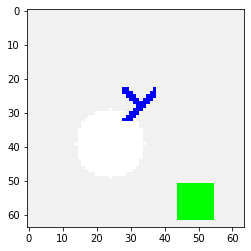

New Prediction:  [[ True]]


81


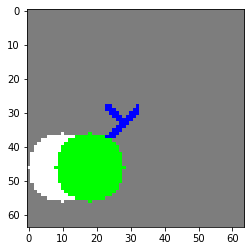

Initial Prediction:  [[ True]]


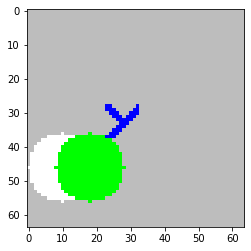

New Prediction:  [[False]]

Hit max_display
Searching Testing Set

5


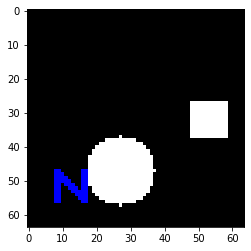

Initial Prediction:  [[False]]


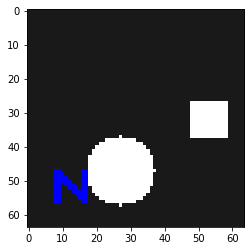

New Prediction:  [[ True]]


6


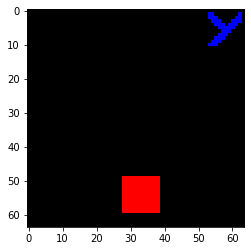

Initial Prediction:  [[False]]


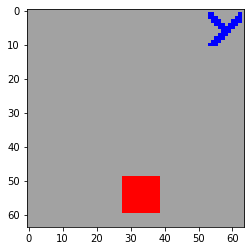

New Prediction:  [[ True]]


9


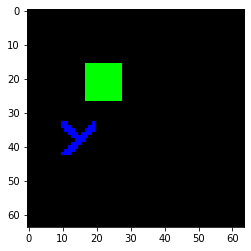

Initial Prediction:  [[False]]


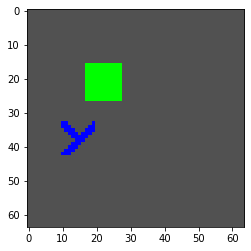

New Prediction:  [[ True]]

Hit max_display


In [11]:
# Check the heuristic's effectiveness on the new model

model.load_weights("Models/new")
print("Searching Training Set")
explore(model, X_train, Y_train, meta_train, heuristic)
print("Searching Testing Set")
explore(model, X_test, Y_test, meta_test, heuristic)